In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [34]:
df=pd.read_csv("diabetes2.csv",na_values='?')

In [35]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
df.sum()

Pregnancies                  2953.000
Glucose                     92847.000
BloodPressure               53073.000
SkinThickness               15772.000
Insulin                     61286.000
BMI                         24570.300
DiabetesPedigreeFunction      362.401
Age                         25529.000
Outcome                       268.000
dtype: float64

In [40]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df["Glucose"].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [42]:
df=pd.get_dummies(df,columns=["Pregnancies","BMI"])

In [43]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,BMI_49.6,BMI_49.7,BMI_50.0,BMI_52.3,BMI_52.9,BMI_53.2,BMI_55.0,BMI_57.3,BMI_59.4,BMI_67.1
0,148,72,35,0,0.627,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,0,0.351,31,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,0,0.672,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,23,94,0.167,21,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,168,2.288,33,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


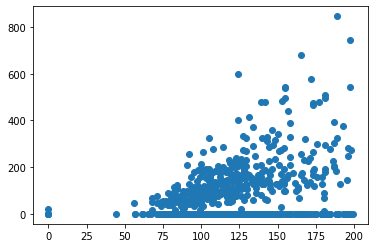

In [44]:
plt.scatter(df.Glucose,df.Insulin)
plt.show()

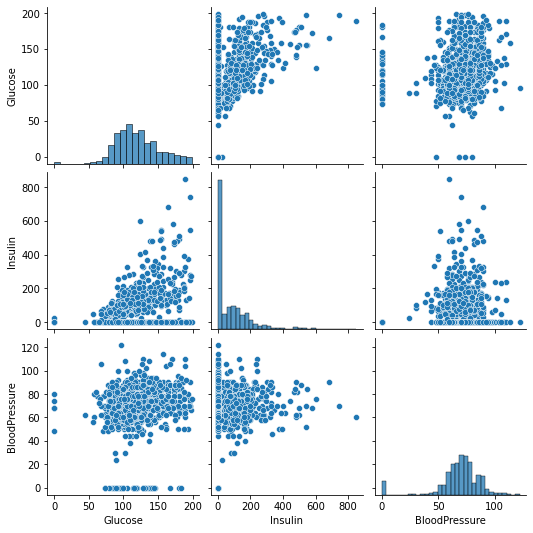

In [45]:
sns.pairplot(data = df, vars=['Glucose','Insulin','BloodPressure'])
plt.show()

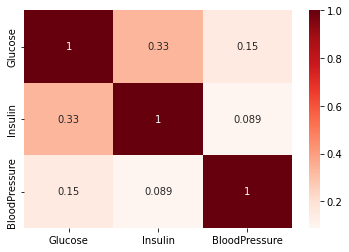

In [46]:
sns.heatmap(df[['Glucose','Insulin','BloodPressure']].corr(), annot=True, cmap = 'Reds')
plt.show()

C:\Users\USER\anaconda3\envs\diabetes\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Glucose', ylabel='count'>

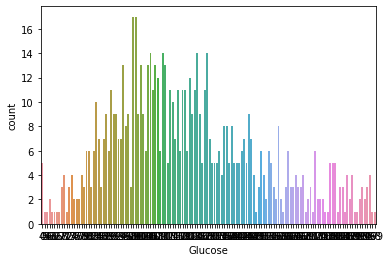

In [47]:
sns.countplot(df.Glucose)

C:\Users\USER\anaconda3\envs\diabetes\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

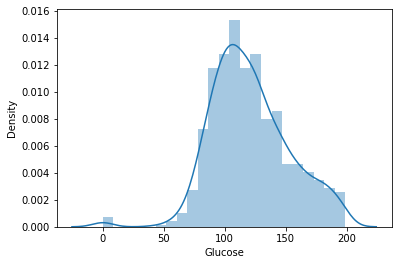

In [48]:
sns.distplot(df.Glucose)

In [49]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_0,Pregnancies_1,Pregnancies_2,...,BMI_49.6,BMI_49.7,BMI_50.0,BMI_52.3,BMI_52.9,BMI_53.2,BMI_55.0,BMI_57.3,BMI_59.4,BMI_67.1
0,148,72,35,0,0.627,50,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,85,66,29,0,0.351,31,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,183,64,0,0,0.672,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,89,66,23,94,0.167,21,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,137,40,35,168,2.288,33,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
numerical_cols=["Glucose","BloodPressure","SkinThickness","Insulin","DiabetesPedigreeFunction","Age"]
cat_cols=list(set(df.columns) - set(numerical_cols)-{"Outcome"})

In [61]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [62]:
len(df_train)

614

In [63]:
len(df_test)

154

In [64]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()                  #Applying StandardScaler()

def get_features_and_target_arrays(df,numerical_cols,cat_cols,scaler):
    x_numeric_scaled=scaler.fit_transform(df[numerical_cols])   #numeric columns
    x_categorical=df[cat_cols].to_numpy()                       #categorical columns
    x=np.hstack((x_categorical, x_numeric_scaled))
    y=df["Outcome"]
    
    return x,y

In [87]:
x_train,y_train=get_features_and_target_arrays(df_train,cat_cols,numerical_cols,scaler)

In [88]:
from sklearn.metrics import mean_squared_error ,accuracy_score

In [89]:
from sklearn import svm

In [90]:
svm_clf = svm.SVC(kernel='linear')               

In [91]:
svm_clf.fit(x_train,y_train) 

SVC(kernel='linear')

In [92]:
test_pred_svm=svm_clf.predict(x_test)
  

In [93]:
mean_squared_error(y_test,test_pred_svm)  

0.2857142857142857

In [94]:
accuracy_score(y_test,test_pred_svm) 

0.7142857142857143

In [95]:
from sklearn.metrics import confusion_matrix

In [97]:
confusion_matrix(y_test,test_pred_svm)

array([[74, 25],
       [19, 36]], dtype=int64)